In [0]:
from google.colab import files
uploaded = files.upload()

Saving twitter.csv to twitter.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
%matplotlib inline

#df = pd.read_csv('output_files/twitter.csv')

df = pd.read_csv(io.BytesIO(uploaded['twitter.csv']))

df.head(5)

,id,type,time,author,author_id,re_tweeter,associated_tweet,text,links,hashtags,mentions,reply_count,favorite_count,retweet_count
0,1156353607714951174,tweet,1564531158000,WestfieldDryCle,1156351958372032513,NaN,1156353607714951174,Our serviceshttps://www.westfielddrycleaners.c...,"['https://t.co/aBwieRdvxF', 'https://t.co/jBXp...","['#drycleaning', '#laundry', '#servicewash', '...",[],0,1,1
1,1156353553616818176,tweet,1564531145000,loveislandthink,1150188268354527232,NaN,1156353553616818176,Favourite Boy?Ovie for the win for me@LoveIsla...,[],"['#LoveIsland', '#LoveIsland', '#Ovie', '#Tomm...",['@LoveIsland'],0,0,0
2,1156353026765946881,tweet,1564531020000,LoveIslandCTV,1121829701964783618,NaN,1156353026765946881,Quick! Get to your TV! #LoveIsland is just min...,['https://t.co/Bqrre5sq7T'],"['#LoveIsland', '#LoveIsland', '#LoveIslandUSA']",[],1,4,2
3,1156352788781289472,tweet,1564530963000,ayoo24,37830710,NaN,1156352788781289472,Lmfaooooo Maura is thirsty as fuck #LoveIsland,[],"['#LoveIsland', '#LoveIsland']",[],0,0,0
4,1156352751162593280,tweet,1564530954000,kie_vs_theworld,744772362214604800,NaN,1156352751162593280,I gotta get on #LoveIsland,[],"['#LoveIsland', '#LoveIsland']",[],0,0,0


In [0]:
df['time'] = df['time'].astype(str).str[:-3]
df['time'] = pd.to_datetime(df['time'],unit='s')
#df = df.set_index('time')
df.head()

,id,type,time,author,author_id,re_tweeter,associated_tweet,text,links,hashtags,mentions,reply_count,favorite_count,retweet_count
0,1156353607714951174,tweet,2019-07-30 23:59:18,WestfieldDryCle,1156351958372032513,NaN,1156353607714951174,Our serviceshttps://www.westfielddrycleaners.c...,"['https://t.co/aBwieRdvxF', 'https://t.co/jBXp...","['#drycleaning', '#laundry', '#servicewash', '...",[],0,1,1
1,1156353553616818176,tweet,2019-07-30 23:59:05,loveislandthink,1150188268354527232,NaN,1156353553616818176,Favourite Boy?Ovie for the win for me@LoveIsla...,[],"['#LoveIsland', '#LoveIsland', '#Ovie', '#Tomm...",['@LoveIsland'],0,0,0
2,1156353026765946881,tweet,2019-07-30 23:57:00,LoveIslandCTV,1121829701964783618,NaN,1156353026765946881,Quick! Get to your TV! #LoveIsland is just min...,['https://t.co/Bqrre5sq7T'],"['#LoveIsland', '#LoveIsland', '#LoveIslandUSA']",[],1,4,2
3,1156352788781289472,tweet,2019-07-30 23:56:03,ayoo24,37830710,NaN,1156352788781289472,Lmfaooooo Maura is thirsty as fuck #LoveIsland,[],"['#LoveIsland', '#LoveIsland']",[],0,0,0
4,1156352751162593280,tweet,2019-07-30 23:55:54,kie_vs_theworld,744772362214604800,NaN,1156352751162593280,I gotta get on #LoveIsland,[],"['#LoveIsland', '#LoveIsland']",[],0,0,0


In [0]:
df.describe()

,id,author_id,re_tweeter,associated_tweet,reply_count,favorite_count,retweet_count
count,1.709725e+06,1.709725e+06,0.0,1.709725e+06,1.709725e+06,1.709725e+06,1.709725e+06
mean,1.146507e+18,2.925791e+17,NaN,1.146485e+18,3.790218e-01,3.703330e+01,4.266162e+00
std,6.290503e+15,4.537294e+17,NaN,6.438626e+15,8.618593e+00,7.706266e+02,1.083704e+02
min,1.134251e+18,7.183000e+03,NaN,2.792488e+17,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.140365e+18,2.263919e+08,NaN,1.140364e+18,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.146887e+18,9.388423e+08,NaN,1.146887e+18,0.000000e+00,2.000000e+00,0.000000e+00
75%,1.151953e+18,8.116932e+17,NaN,1.151952e+18,0.000000e+00,4.000000e+00,0.000000e+00
max,1.156354e+18,1.156352e+18,NaN,1.156354e+18,3.371000e+03,1.164870e+05,2.522500e+04


In [0]:
df.drop(['re_tweeter'], axis = 1, inplace = True)
df.isnull().sum()

id                  0
type                0
time                0
author              0
author_id           0
associated_tweet    0
text                0
links               0
hashtags            0
mentions            0
reply_count         0
favorite_count      0
retweet_count       0
dtype: int64

In [0]:
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


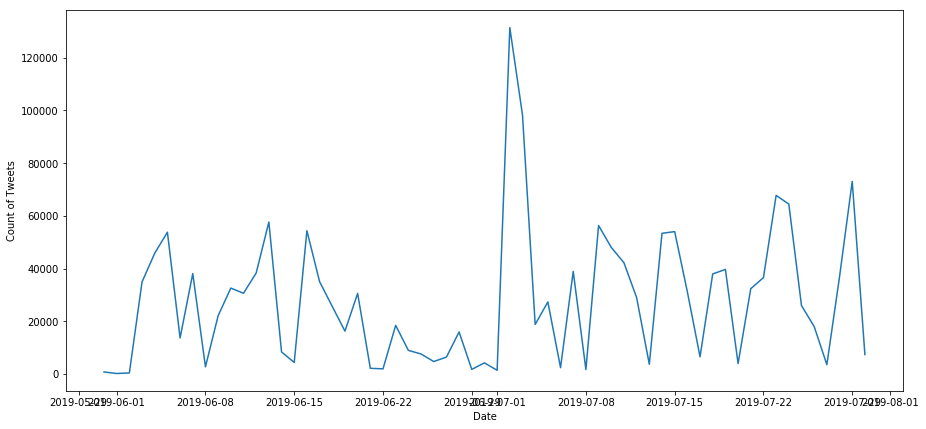

In [0]:
count_by_date = df.groupby('date').size()

plt.figure(figsize=(15,7))
plt.xlabel('Date')
plt.ylabel('Count of Tweets')
plt.plot(count_by_date);

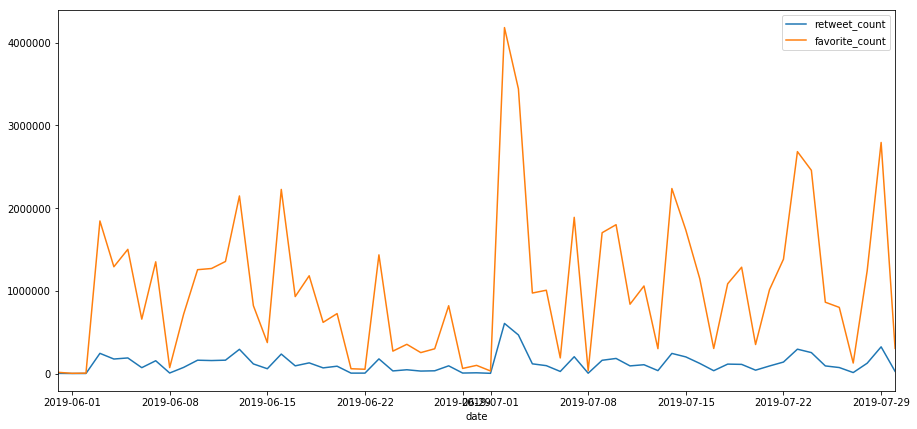

In [0]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['date'])['retweet_count'].sum().plot(ax=ax)
df.groupby(['date'])['favorite_count'].sum().plot(ax=ax)
plt.legend()
plt.show()

In [0]:
from textblob import TextBlob

df['sentiment'] = df['text'].apply(lambda tweet: TextBlob(tweet).sentiment)

In [0]:
df_copy = df
df.head()

,id,type,time,author,author_id,associated_tweet,text,links,hashtags,mentions,reply_count,favorite_count,retweet_count,date,sentiment
0,1156353607714951174,tweet,2019-07-30 23:59:18,WestfieldDryCle,1156351958372032513,1156353607714951174,Our serviceshttps://www.westfielddrycleaners.c...,"['https://t.co/aBwieRdvxF', 'https://t.co/jBXp...","['#drycleaning', '#laundry', '#servicewash', '...",[],0,1,1,2019-07-30,"(0.0, 0.0)"
1,1156353553616818176,tweet,2019-07-30 23:59:05,loveislandthink,1150188268354527232,1156353553616818176,Favourite Boy?Ovie for the win for me@LoveIsla...,[],"['#LoveIsland', '#LoveIsland', '#Ovie', '#Tomm...",['@LoveIsland'],0,0,0,2019-07-30,"(0.8, 0.4)"
2,1156353026765946881,tweet,2019-07-30 23:57:00,LoveIslandCTV,1121829701964783618,1156353026765946881,Quick! Get to your TV! #LoveIsland is just min...,['https://t.co/Bqrre5sq7T'],"['#LoveIsland', '#LoveIsland', '#LoveIslandUSA']",[],1,4,2,2019-07-30,"(0.5208333333333333, 0.5)"
3,1156352788781289472,tweet,2019-07-30 23:56:03,ayoo24,37830710,1156352788781289472,Lmfaooooo Maura is thirsty as fuck #LoveIsland,[],"['#LoveIsland', '#LoveIsland']",[],0,0,0,2019-07-30,"(-0.4, 0.6)"
4,1156352751162593280,tweet,2019-07-30 23:55:54,kie_vs_theworld,744772362214604800,1156352751162593280,I gotta get on #LoveIsland,[],"['#LoveIsland', '#LoveIsland']",[],0,0,0,2019-07-30,"(0.0, 0.0)"


In [0]:
df['sentiment'] = df['sentiment'].astype(str)
split = df['sentiment'].str.split(',')
df['polarity'] = split.apply(lambda x: x[0])
df['subjectivity'] = split.apply(lambda x: x[1])

In [0]:
df.head()

,id,type,time,author,author_id,associated_tweet,text,links,hashtags,mentions,reply_count,favorite_count,retweet_count,date,sentiment,polarity,subjectivity
0,1156353607714951174,tweet,2019-07-30 23:59:18,WestfieldDryCle,1156351958372032513,1156353607714951174,Our serviceshttps://www.westfielddrycleaners.c...,"['https://t.co/aBwieRdvxF', 'https://t.co/jBXp...","['#drycleaning', '#laundry', '#servicewash', '...",[],0,1,1,2019-07-30,"Sentiment(polarity=0.0, subjectivity=0.0)",Sentiment(polarity=0.0,subjectivity=0.0)
1,1156353553616818176,tweet,2019-07-30 23:59:05,loveislandthink,1150188268354527232,1156353553616818176,Favourite Boy?Ovie for the win for me@LoveIsla...,[],"['#LoveIsland', '#LoveIsland', '#Ovie', '#Tomm...",['@LoveIsland'],0,0,0,2019-07-30,"Sentiment(polarity=0.8, subjectivity=0.4)",Sentiment(polarity=0.8,subjectivity=0.4)
2,1156353026765946881,tweet,2019-07-30 23:57:00,LoveIslandCTV,1121829701964783618,1156353026765946881,Quick! Get to your TV! #LoveIsland is just min...,['https://t.co/Bqrre5sq7T'],"['#LoveIsland', '#LoveIsland', '#LoveIslandUSA']",[],1,4,2,2019-07-30,"Sentiment(polarity=0.5208333333333333, subject...",Sentiment(polarity=0.5208333333333333,subjectivity=0.5)
3,1156352788781289472,tweet,2019-07-30 23:56:03,ayoo24,37830710,1156352788781289472,Lmfaooooo Maura is thirsty as fuck #LoveIsland,[],"['#LoveIsland', '#LoveIsland']",[],0,0,0,2019-07-30,"Sentiment(polarity=-0.4, subjectivity=0.6)",Sentiment(polarity=-0.4,subjectivity=0.6)
4,1156352751162593280,tweet,2019-07-30 23:55:54,kie_vs_theworld,744772362214604800,1156352751162593280,I gotta get on #LoveIsland,[],"['#LoveIsland', '#LoveIsland']",[],0,0,0,2019-07-30,"Sentiment(polarity=0.0, subjectivity=0.0)",Sentiment(polarity=0.0,subjectivity=0.0)


In [0]:
df['polarity'] = df['polarity'].str[19:]
df['subjectivity'] = df['subjectivity'].str[14:-1]
df.head()

,id,type,time,author,author_id,associated_tweet,text,links,hashtags,mentions,reply_count,favorite_count,retweet_count,date,sentiment,polarity,subjectivity
0,1156353607714951174,tweet,2019-07-30 23:59:18,WestfieldDryCle,1156351958372032513,1156353607714951174,Our serviceshttps://www.westfielddrycleaners.c...,"['https://t.co/aBwieRdvxF', 'https://t.co/jBXp...","['#drycleaning', '#laundry', '#servicewash', '...",[],0,1,1,2019-07-30,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0
1,1156353553616818176,tweet,2019-07-30 23:59:05,loveislandthink,1150188268354527232,1156353553616818176,Favourite Boy?Ovie for the win for me@LoveIsla...,[],"['#LoveIsland', '#LoveIsland', '#Ovie', '#Tomm...",['@LoveIsland'],0,0,0,2019-07-30,"Sentiment(polarity=0.8, subjectivity=0.4)",0.8,0.4
2,1156353026765946881,tweet,2019-07-30 23:57:00,LoveIslandCTV,1121829701964783618,1156353026765946881,Quick! Get to your TV! #LoveIsland is just min...,['https://t.co/Bqrre5sq7T'],"['#LoveIsland', '#LoveIsland', '#LoveIslandUSA']",[],1,4,2,2019-07-30,"Sentiment(polarity=0.5208333333333333, subject...",0.5208333333333333,0.5
3,1156352788781289472,tweet,2019-07-30 23:56:03,ayoo24,37830710,1156352788781289472,Lmfaooooo Maura is thirsty as fuck #LoveIsland,[],"['#LoveIsland', '#LoveIsland']",[],0,0,0,2019-07-30,"Sentiment(polarity=-0.4, subjectivity=0.6)",-0.4,0.6
4,1156352751162593280,tweet,2019-07-30 23:55:54,kie_vs_theworld,744772362214604800,1156352751162593280,I gotta get on #LoveIsland,[],"['#LoveIsland', '#LoveIsland']",[],0,0,0,2019-07-30,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0


In [0]:
df.to_csv('data.csv')


In [0]:

!cp Love_Island_With_Sentiment.csv drive/My\ Drive/